In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import plotly.graph_objects as go

In [36]:
palette = ["#0077C8", "#005EA8", "#003F72", "#0094D8", "#66C5E3"]
palette_red = ["#DC1C13", "#EA4C46", "#F07470"]

In [37]:
anotonio_path = "../fonts/Antonio-Regular.ttf"
poppins_path = "../fonts/Poppins-Regular.ttf"
fm.fontManager.addfont(anotonio_path)
fm.fontManager.addfont(poppins_path)
plt.rcParams['font.family'] = 'antonio'

In [38]:
df = pd.read_csv("../dataset/created/df_view.csv")

In [39]:
df["ATRASADO"] = df["DELAY"]
df["CANCELADO"] = df["CANCELLED"]
df["DESVIADO"] = df["DIVERTED"]


In [40]:
problematic_columns = ['ATRASADO', 'CANCELADO', 'DESVIADO']

In [41]:
total_flights = len(df)
total_flights

536720

In [42]:
df['ATRASADO'].sum()

np.int64(201760)

In [43]:
df['CANCELADO'].sum()

np.int64(10230)

In [44]:
df['DESVIADO'].sum()

np.int64(1335)

In [45]:
# Aplicar ordenação categórica
weekday_order = ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"]
period_order = ["Madrugada", "Manhã", "Tarde", "Noite"]

df["DAY_OF_WEEK"] = pd.Categorical(df["DAY_OF_WEEK"], categories=weekday_order, ordered=True)
df["TIME_PERIOD"] = pd.Categorical(df["TIME_PERIOD"], categories=period_order, ordered=True)

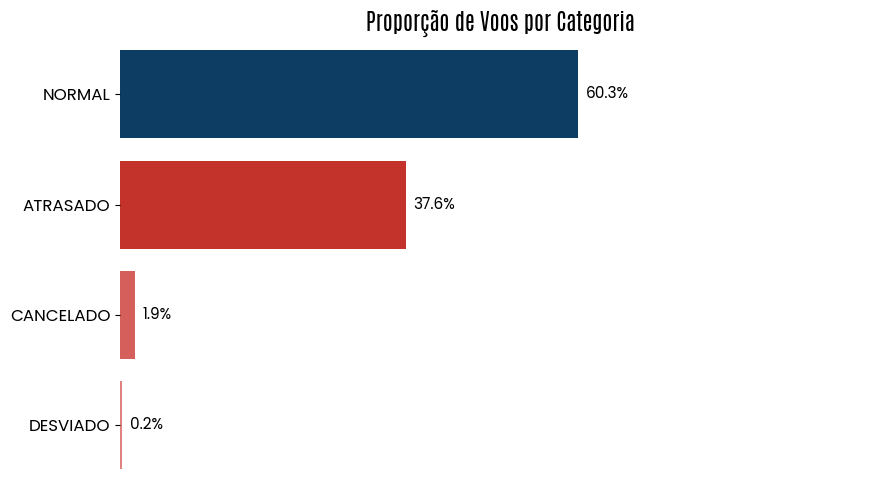

In [46]:
problem_counts = df[problematic_columns].sum()

total_problematic_flights = df[problematic_columns].any(axis=1).sum()
normal_flights_count = total_flights - total_problematic_flights

all_counts = problem_counts.to_dict()
all_counts["NORMAL"] = normal_flights_count
summary_df = pd.DataFrame(all_counts.items(), columns=["Problem_Type", "Count"])

summary_df["Percentage"] = (summary_df["Count"] / total_flights) * 100
summary_df.loc[summary_df['Problem_Type'] == 'DEP_DEL15', 'Problem_Type'] = 'ATRASADO'
summary_df_sorted = summary_df.sort_values(by="Percentage", ascending=False)

plt.figure(figsize=(9, 5))
ax = sns.barplot(
    data=summary_df_sorted,
    x="Percentage",
    y="Problem_Type",
    hue="Problem_Type",
    palette=["#003F72", "#DC1C13", "#EA4C46", "#F07470"],
    legend=False
)

# Adiciona rótulos de porcentagem
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2.,
            f'{width:.1f}%',
            ha="left", va="center", fontsize=11, fontweight="medium", family="Poppins")

# Ajusta título com Manrope
plt.title("Proporção de Voos por Categoria", fontsize=16, fontweight="bold", family="Antonio")

# Ajustes minimalistas
plt.xlabel("")  
plt.ylabel("")
plt.xlim(0, 100)
plt.xticks([])  # remove ticks do eixo x
plt.yticks(fontsize=12, family="Poppins")
sns.despine(left=True, bottom=True)  # remove bordas extras
plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

In [47]:
def plot_avg_metric(df, group_col, metric_col, top_n=10, title=""):
    """
    Cria gráfico de barras minimalista para valores médios.
    """
    data = (
        df.groupby(group_col, observed=True)[metric_col]
        .mean()
        .sort_values(ascending=False)
        .head(top_n)
        .reset_index()
    )

    plt.figure(figsize=(9, 5))
    ax = sns.barplot(
        data=data,
        x=metric_col,
        y=group_col,
        color="#0077C8",
        orient="h"
    )

    # Rótulos no fim da barra
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5, p.get_y() + p.get_height() / 2.,
                f'{width:.1f}', ha="left", va="center",
                fontsize=11, fontweight="medium", family="Poppins")

    # Estilo minimalista
    plt.title(title, fontsize=16, fontweight="bold", family="Antonio")
    plt.xlabel("")  
    plt.ylabel("")  
    plt.xticks([])  
    plt.yticks(fontsize=12, family="Poppins")
    sns.despine(left=True, bottom=True)
    plt.grid(axis="x", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

In [48]:
def plot_count_metrics(df, group_col, metrics, top_n=10, title=""):
    """
    Cria gráfico de barras minimalista para contagem de eventos (atrasos, cancelamentos, desvios).
    
    Args:
        df (pd.DataFrame): dataset
        group_col (str): coluna para agrupar (ex.: companhia, cidade)
        metrics (list): lista de colunas booleanas (ex.: ["DELAY", "CANCELLED", "DIVERTED"])
        top_n (int): quantos grupos mostrar
        title (str): título do gráfico
    """
    data = (
        df.groupby(group_col, observed=True)[metrics]
        .sum()
        .sort_values(by=metrics, ascending=False)
        .head(top_n)
        .reset_index()
    )

    # "derreter" para formato long -> facilita o gráfico
    data_melted = data.melt(id_vars=group_col, value_vars=metrics,
                            var_name="Problema", value_name="Quantidade")

    plt.figure(figsize=(9, 5))
    ax = sns.barplot(
        data=data_melted,
        x="Quantidade",
        y=group_col,
        hue="Problema",
        palette=["#0094D8", "#005EA8", "#003F72"],
        orient="h"
    )

    # Rótulos nas barras
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(width + 10, p.get_y() + p.get_height() / 2.,
                    f'{int(width)}', ha="left", va="center",
                    fontsize=10, family="Poppins")

    # Estilo minimalista
    plt.title(title, fontsize=16, fontweight="bold", family="Antonio")
    plt.xlabel("")  
    plt.ylabel("")  
    plt.xticks([])  
    plt.yticks(fontsize=12, family="Poppins")
    sns.despine(left=True, bottom=True)
    plt.grid(axis="x", linestyle="--", alpha=0.4)
    plt.legend(title="", fontsize=10, loc="lower right")
    plt.tight_layout()
    plt.show()


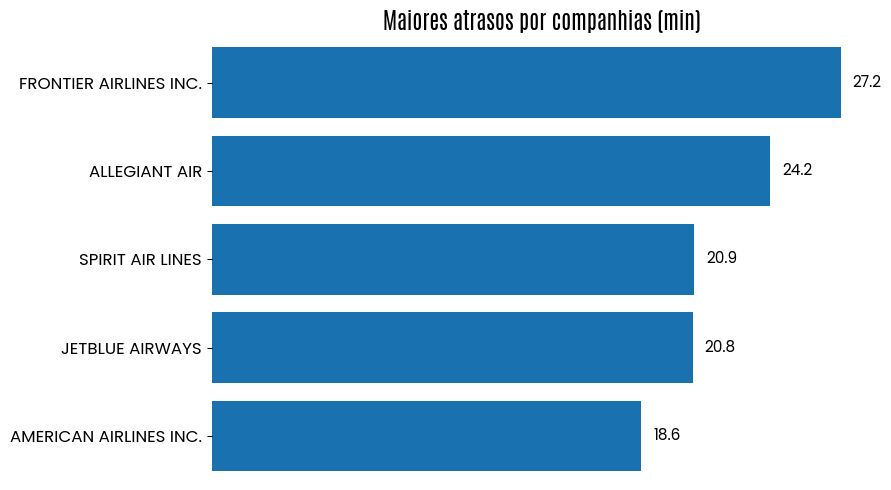

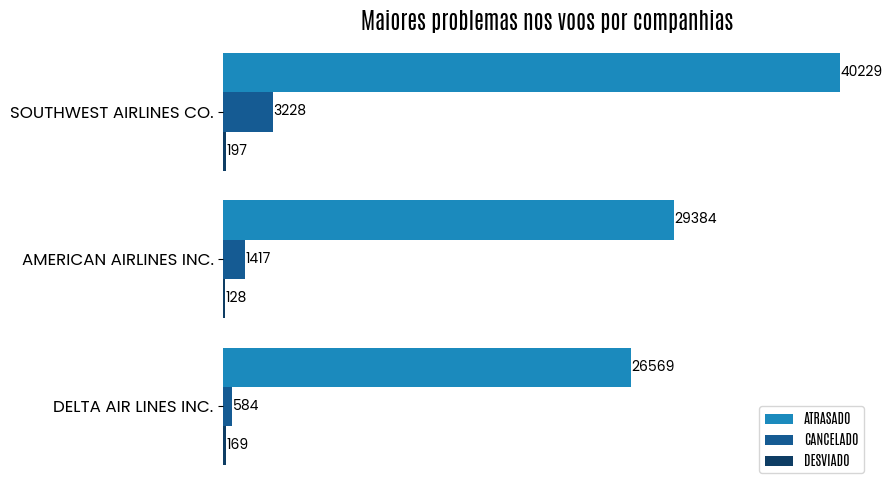

In [49]:
plot_avg_metric(df, "AIRLINE_Description", "DELAY_OVERALL", top_n=5,
                title="Maiores atrasos por companhias (min)")
plot_count_metrics(df, "AIRLINE_Description", ["ATRASADO", "CANCELADO", "DESVIADO"], top_n=3,
                   title="Maiores problemas nos voos por companhias")

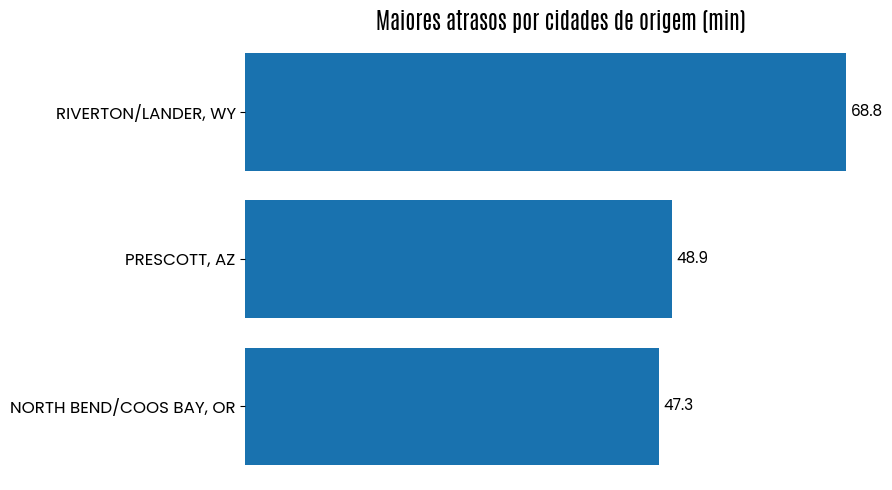

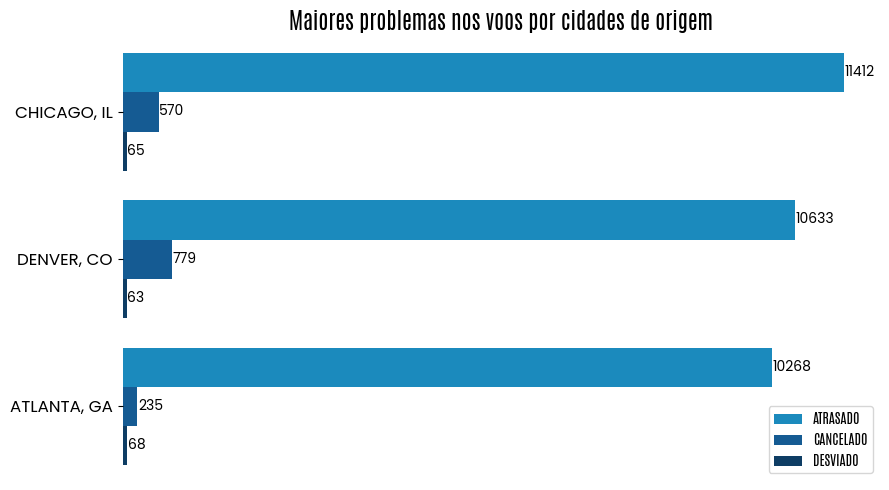

In [50]:
plot_avg_metric(df, "ORIGIN_CITY", "DELAY_OVERALL", top_n=3,
                title="Maiores atrasos por cidades de origem (min)")
plot_count_metrics(df, "ORIGIN_CITY", ["ATRASADO", "CANCELADO", "DESVIADO"], top_n=3,
                   title="Maiores problemas nos voos por cidades de origem")

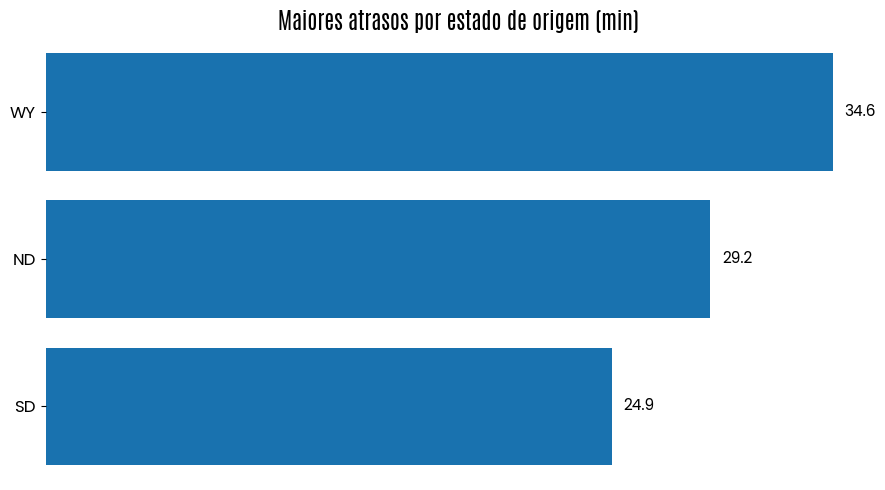

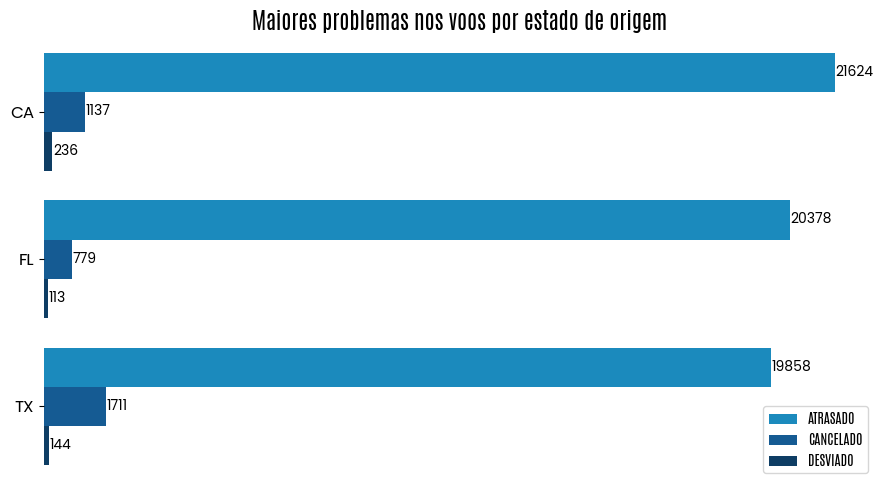

In [51]:
plot_avg_metric(df, "ORIGIN_STATE", "DELAY_OVERALL", top_n=3,
                title="Maiores atrasos por estado de origem (min)")
plot_count_metrics(df, "ORIGIN_STATE", ["ATRASADO", "CANCELADO", "DESVIADO"], top_n=3,
                   title="Maiores problemas nos voos por estado de origem")

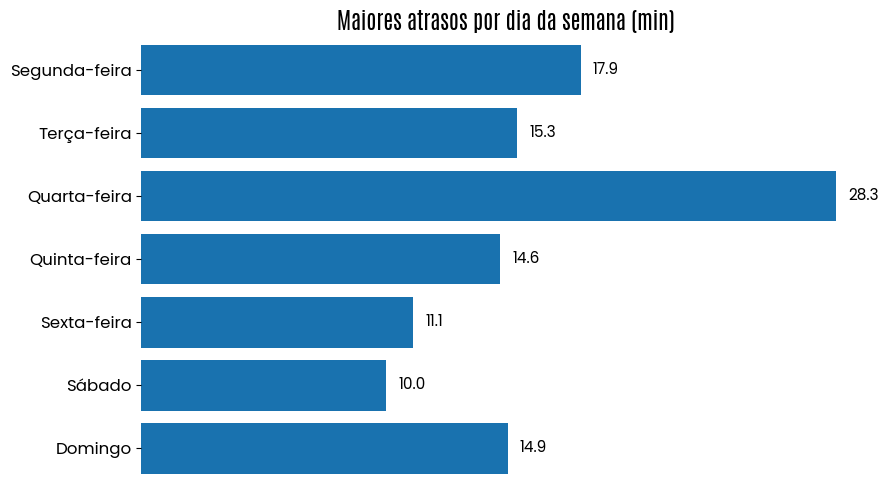

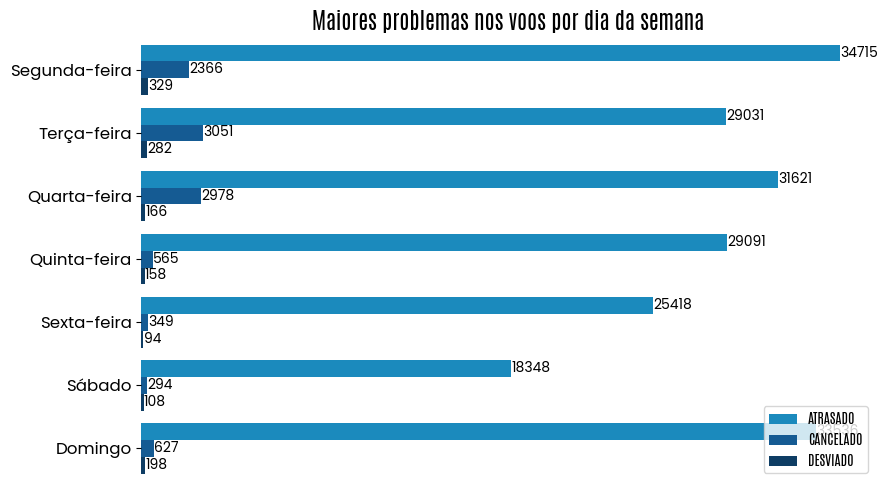

In [52]:
plot_avg_metric(df, "DAY_OF_WEEK", "DELAY_OVERALL", top_n=7,
                title="Maiores atrasos por dia da semana (min)")
plot_count_metrics(df, "DAY_OF_WEEK", ["ATRASADO", "CANCELADO", "DESVIADO"], top_n=7,
                   title="Maiores problemas nos voos por dia da semana")

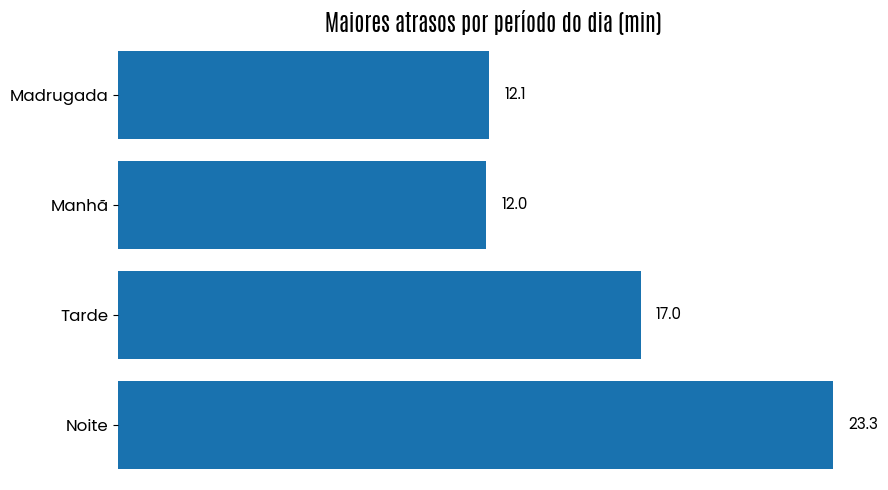

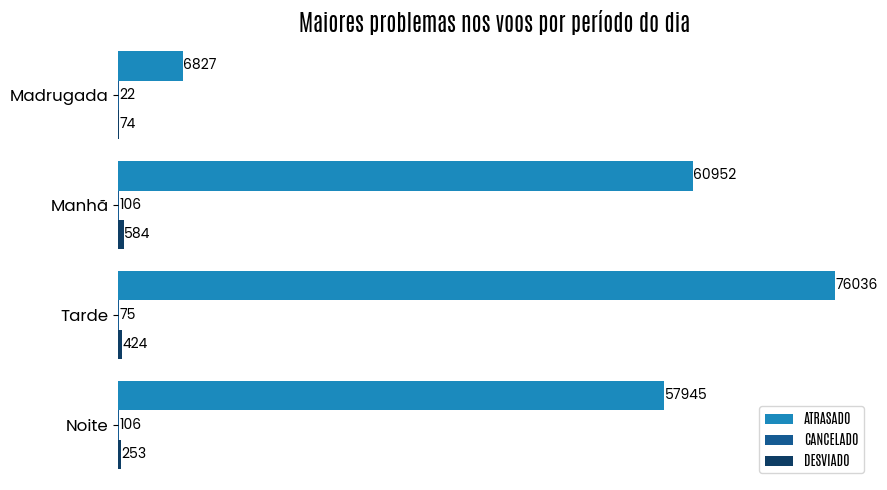

In [53]:
plot_avg_metric(df, "TIME_PERIOD", "DELAY_OVERALL", top_n=7,
                title="Maiores atrasos por período do dia (min)")
plot_count_metrics(df, "TIME_PERIOD", ["ATRASADO", "CANCELADO", "DESVIADO"], top_n=7,
                   title="Maiores problemas nos voos por período do dia")

In [54]:
def criar_mapa_rotas_avancado(df, top_n=20, altura=600, selected_metric='avg_delay_per_distance'):
    """Cria um mapa interativo das rotas de voo com destaque para cidades e estados específicos"""
    
    # Configurações das métricas
    METRIC_CONFIG = {
        'avg_delay': {'col': 'DELAY_OVERALL', 'agg': 'mean', 'title': 'Atraso Médio', 'unit': 'min'},
        'delay_count': {'col': 'DELAY', 'agg': 'sum', 'title': 'Quantidade de Atrasos', 'unit': 'voos'},
        'cancelled_count': {'col': 'CANCELLED', 'agg': 'sum', 'title': 'Quantidade de Cancelamentos', 'unit': 'voos'},
        'diverted_count': {'col': 'DIVERTED', 'agg': 'sum', 'title': 'Quantidade de Desvios', 'unit': 'voos'},
        'avg_delay_per_distance': {'col': 'DELAY_PER_DISTANCE', 'agg': 'mean', 'title': 'Atraso Médio por Distância', 'unit': 'min/milha'}
    }
    
    config = METRIC_CONFIG.get(selected_metric, METRIC_CONFIG['avg_delay_per_distance'])
    
    # Verificar colunas necessárias
    REQUIRED_COLS = ['ORIGIN_CITY', 'DEST_CITY', 'ORIGIN_LAT', 'ORIGIN_LON', 'DEST_LAT', 'DEST_LON', 'DISTANCE']
    missing_cols = [col for col in REQUIRED_COLS if col not in df.columns]
    
    if missing_cols:
        return _create_error_figure(f"Dados de coordenadas ou distância não disponíveis: {', '.join(missing_cols)}", altura)
    
    # Processar dados das rotas
    rotas_data = _processar_dados_rotas(df, config, top_n)
    
    if rotas_data.empty:
        return _create_error_figure("Nenhuma rota válida encontrada", altura)
    
    # Criar figura
    fig = _criar_figura_mapa(rotas_data, config, altura)
    
    return fig


def _processar_dados_rotas(df, config, top_n):
    """Processa e agrupa os dados das rotas, calculando DELAY_PER_DISTANCE"""
    df['DELAY_OVERALL'] = pd.to_numeric(df['DELAY_OVERALL'], errors='coerce')
    df['DISTANCE'] = pd.to_numeric(df['DISTANCE'], errors='coerce')
    df = df.dropna(subset=['DELAY_OVERALL', 'DISTANCE'])
    
    df['DELAY_PER_DISTANCE'] = df.apply(lambda row: row['DELAY_OVERALL'] / row['DISTANCE'] if row['DISTANCE'] != 0 else 0, axis=1)
    
    agg_dict = {
        'DELAY_OVERALL': 'mean',
        'DELAY_PER_DISTANCE': 'mean',
        'FL_DATE': 'count',
        'TIME_HOUR': 'mean'
    }
    
    rotas_data = (
        df.groupby(["ORIGIN_CITY", "DEST_CITY", "ORIGIN_LAT", "ORIGIN_LON", "DEST_LAT", "DEST_LON", "DISTANCE"], 
                   as_index=False)
        .agg(agg_dict)
        .rename(columns={'FL_DATE': 'TOTAL_VOOS'})
        .sort_values(by=config['col'], ascending=False)
        .head(top_n)
        .dropna(subset=['ORIGIN_LAT', 'ORIGIN_LON', 'DEST_LAT', 'DEST_LON'])
        .reset_index(drop=True)
    )
    
    return rotas_data


def _criar_figura_mapa(rotas_data, config, altura):
    """Cria a figura do mapa com as rotas"""
    fig = go.Figure()
    
    # Adicionar marcadores de estados críticos primeiro (atrás das rotas)
    _adicionar_marcadores_estados(fig)
    
    # Calcular espessuras normalizadas
    espessuras = _calcular_espessuras(rotas_data, config['col'])
    
    # Adicionar rotas
    _adicionar_rotas(fig, rotas_data, espessuras, config)
    
    # Adicionar marcadores comuns
    _adicionar_marcadores_comuns(fig, rotas_data)
    
    # Adicionar destaque para cidades específicas (por último, para ficarem visíveis)
    _adicionar_destaque_cidades(fig, rotas_data)
    
    # Atualizar layout
    _atualizar_layout(fig, config, altura)
    
    return fig


def _adicionar_rotas(fig, rotas_data, espessuras, config):
    """Adiciona as linhas das rotas ao mapa"""
    for idx, rota in rotas_data.iterrows():
        cor = _calcular_cor_horario(rota['TIME_HOUR'])
        
        fig.add_trace(go.Scattergeo(
            lon=[rota['ORIGIN_LON'], rota['DEST_LON']],
            lat=[rota['ORIGIN_LAT'], rota['DEST_LAT']],
            mode='lines',
            line=dict(width=espessuras[idx], color=cor),
            name=f"{rota['ORIGIN_CITY']} → {rota['DEST_CITY']}",
            showlegend=False,
            hovertemplate=(
                f"<b>{rota['ORIGIN_CITY']} → {rota['DEST_CITY']}</b><br>"
                f"Atraso Médio: {rota['DELAY_OVERALL']:.1f} min<br>"
                f"{config['title']}: {rota[config['col']]:.3f} {config['unit']}<br>"
                f"Hora Média: {rota['TIME_HOUR']:.1f}h<br>"
                f"Total de Voos: {rota['TOTAL_VOOS']}<br>"
                f"Distância: {rota['DISTANCE']:.0f} milhas<br>"
                "<extra></extra>"
            )
        ))


def _adicionar_marcadores_comuns(fig, rotas_data):
    """Adiciona marcadores de origem e destino comuns"""
    # Marcadores de origem (verde)
    fig.add_trace(go.Scattergeo(
        lon=rotas_data['ORIGIN_LON'],
        lat=rotas_data['ORIGIN_LAT'],
        mode='markers',
        marker=dict(size=7, color='green', symbol='circle', line=dict(width=1, color='white')),
        text=rotas_data['ORIGIN_CITY'],
        name="Origem",
        hovertemplate="<b>%{text}</b><br><i>Aeroporto de Origem</i><extra></extra>",
        showlegend=False
    ))
    
    # Marcadores de destino (vermelho)
    fig.add_trace(go.Scattergeo(
        lon=rotas_data['DEST_LON'],
        lat=rotas_data['DEST_LAT'],
        mode='markers',
        marker=dict(size=7, color='red', symbol='circle', line=dict(width=1, color='white')),
        text=rotas_data['DEST_CITY'],
        name="Destino",
        hovertemplate="<b>%{text}</b><br><i>Aeroporto de Destino</i><extra></extra>",
        showlegend=False
    ))


def _adicionar_destaque_cidades(fig, rotas_data):
    """Adiciona destaque especial para cidades específicas"""
    # Coordenadas fixas das cidades críticas
    cidades_destaque = {
        'Chicago': {'lat': 41.8781, 'lon': -87.6298},
        'Denver': {'lat': 39.7392, 'lon': -104.9903},
        'Atlanta': {'lat': 33.7490, 'lon': -84.3880},
        'Dallas': {'lat': 32.7767, 'lon': -96.7970}
    }
    
    # Adicionar marcadores estrela para cada cidade
    for cidade, coords in cidades_destaque.items():
        fig.add_trace(go.Scattergeo(
            lon=[coords['lon']],
            lat=[coords['lat']],
            mode='markers+text',
            marker=dict(
                size=5, 
                color='#FFD700', 
                symbol='star', 
                line=dict(width=3, color='#FF8C00')
            ),
            text=[cidade],
            textposition="top center",
            textfont=dict(size=12, color='#000', family='Arial Black'),
            name="Cidade Crítica",
            hovertemplate=f"<b>⭐ {cidade}</b><br>"
                         f"<i>Cidade com métricas críticas</i><br>"
                         f"• 1.2x mais problemas operacionais<br>"
                         f"• Cancelamentos e desvios elevados<extra></extra>",
            showlegend=False
        ))


def _adicionar_marcadores_estados(fig):
    """Adiciona marcadores discretos para estados críticos"""
    
    # Coordenadas aproximadas do centro de cada estado
    estados_centros = {
        'CA': {'lon': -119.4, 'lat': 36.7, 'nome': 'Califórnia'},
        'FL': {'lon': -81.5, 'lat': 27.9, 'nome': 'Flórida'},
        'TX': {'lon': -99.9, 'lat': 31.0, 'nome': 'Texas'},
        'CO': {'lon': -105.5, 'lat': 39.0, 'nome': 'Colorado'}
    }
    
    # Adicionar marcadores hexagonais sutis para os estados
    for estado, dados in estados_centros.items():
        fig.add_trace(go.Scattergeo(
            lon=[dados['lon']],
            lat=[dados['lat']],
            mode='markers+text',
            marker=dict(
                size=35,
                color='rgba(255, 100, 100, 0.25)',
                symbol='hexagon',
                line=dict(width=2, color='rgba(255, 50, 50, 0.6)')
            ),
            text=[estado],
            textfont=dict(size=14, color='rgba(200, 0, 0, 0.8)', family='Arial Black'),
            textposition="middle center",
            name=f"Estado Crítico: {dados['nome']}",
            showlegend=False,
            hovertemplate=(
                f"<b>🔴 {dados['nome']} ({estado})</b><br>"
                f"<i>Estado com indicadores críticos</i><br>"
                f"• Atraso médio 1.19x maior<br>"
                f"• Risco elevado de problemas<extra></extra>"
            )
        ))


def _calcular_cor_horario(time_hour):
    """Calcula cor baseada no horário usando escala HSL"""
    hora_normalizada = time_hour / 23.0
    
    # Matiz de azul claro para azul escuro/roxo
    hue = 200 + (hora_normalizada * 80)
    
    # Saturação aumenta com o tempo
    saturation = 60 + (hora_normalizada * 30)
    
    # Luminosidade varia: mais clara no meio do dia
    if time_hour <= 12:
        lightness = 30 + (time_hour / 12.0) * 40
    else:
        lightness = 70 - ((time_hour - 12) / 11.0) * 40
    
    hue = max(0, min(hue, 360))
    saturation = max(0, min(saturation, 100))
    lightness = max(0, min(lightness, 100))
    
    return f'hsl({hue:.0f}, {saturation:.0f}%, {lightness:.0f}%)'


def _calcular_espessuras(rotas_data, col_metric):
    """Calcula espessuras normalizadas para as rotas com base na métrica"""
    min_metric = rotas_data[col_metric].min()
    max_metric = rotas_data[col_metric].max()
    
    if max_metric <= min_metric or pd.isna(min_metric) or pd.isna(max_metric):
        return [3] * len(rotas_data)
    
    espessuras = []
    for valor in rotas_data[col_metric]:
        if pd.isna(valor):
            espessuras.append(3)
            continue
        metric_normalizada = (valor - min_metric) / (max_metric - min_metric)
        espessura = 1.5 + (metric_normalizada ** 1.5) * 7
        espessuras.append(max(1.5, min(espessura, 8.5)))
    
    return espessuras


def _atualizar_layout(fig, config, altura):
    """Atualiza o layout do mapa"""
    subtitle_text = (
        f"🎨 Cor: Hora média do voo | "
        f"📏 Espessura: {config['title']} | "
        f"🟢 Origem | 🔴 Destino"
    )
    
    destaque_text = (
        f"<br><sub>⭐ <b>Cidades críticas:</b> Chicago, Denver, Atlanta, Dallas/Fort Worth (1.2x mais problemas) | "
        f"🔴 <b>Estados críticos:</b> CA, FL, TX, CO (Atraso 1.19x maior)</sub>"
    )
    
    fig.update_layout(
        title=dict(
            text=f"<b>Principais Rotas Aéreas - {config['title']}</b><br>"
                 f"<sub>{subtitle_text}</sub>"
                 f"{destaque_text}",
            x=0.5,
            xanchor='center',
            font=dict(size=14)
        ),
        geo=dict(
            scope='usa',
            projection_type='albers usa',
            showland=True,
            landcolor='rgb(243, 243, 238)',
            showlakes=True,
            lakecolor='rgb(220, 235, 255)',
            showsubunits=True,
            subunitcolor='rgb(200, 200, 200)',
            subunitwidth=0.5,
            showcoastlines=True,
            coastlinecolor='rgb(180, 180, 180)',
            coastlinewidth=0.5,
            bgcolor='rgba(255,255,255,0.1)',
        ),
        height=altura,
        margin=dict(l=0, r=0, t=120, b=0),
        showlegend=False,
        hoverlabel=dict(
            bgcolor="white",
            font_size=12,
            font_family="Arial"
        )
    )


def _create_error_figure(message, altura):
    """Cria figura de erro"""
    fig = go.Figure()
    fig.update_layout(
        title=dict(text=message, x=0.5, xanchor='center'),
        height=altura,
        xaxis=dict(visible=False),
        yaxis=dict(visible=False)
    )
    return fig


# Exemplo de uso
map_fig = criar_mapa_rotas_avancado(df, top_n=50, altura=600)
map_fig.show()

In [55]:
def plot_line_chart_continuous(df, x_col, y_col, title):
    """
    Plota gráfico de linha minimalista para médias de uma métrica por agrupamento,
    incluindo uma linha de referência da média geral.
    
    Args:
        df (pd.DataFrame): Dados de entrada.
        x_col (str): Coluna para eixo X (ex.: 'DISTANCE', 'DAY_OF_MONTH', 'TIME_HOUR').
        y_col (str): Coluna da métrica (ex.: 'DELAY_OVERALL').
        title (str): Título do gráfico.
    """
    # Calcula a média do atraso por grupo
    grouped = df.groupby(x_col, observed=True)[y_col].mean().sort_index()

    # Média geral
    global_mean = df[y_col].mean()

    plt.figure(figsize=(9, 5))
    sns.lineplot(x=grouped.index, y=grouped.values, color="#2166AC", linewidth=2.5, marker="o")

    # Linha da média geral
    plt.axhline(global_mean, color="#DC1C13", linestyle="--", linewidth=2, alpha=0.7, label="Média Geral")

    # Estilo minimalista
    plt.title(title, fontsize=16, fontweight="bold", family="Antonio")
    plt.xlabel(x_col, fontsize=12, family="Poppins")
    plt.ylabel(y_col, fontsize=12, family="Poppins")

    plt.xticks(fontsize=11, family="Poppins")
    plt.yticks(fontsize=11, family="Poppins")
    sns.despine(left=True, bottom=True)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.legend(frameon=False, fontsize=11, loc="upper right", prop={"family": "Poppins"})
    plt.tight_layout()
    plt.show()

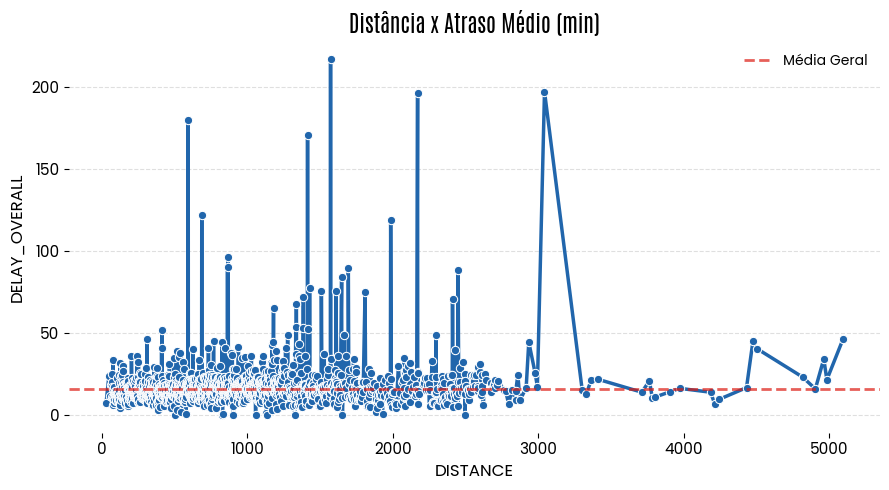

In [56]:
plot_line_chart_continuous(df, x_col="DISTANCE", y_col="DELAY_OVERALL", title="Distância x Atraso Médio (min)")

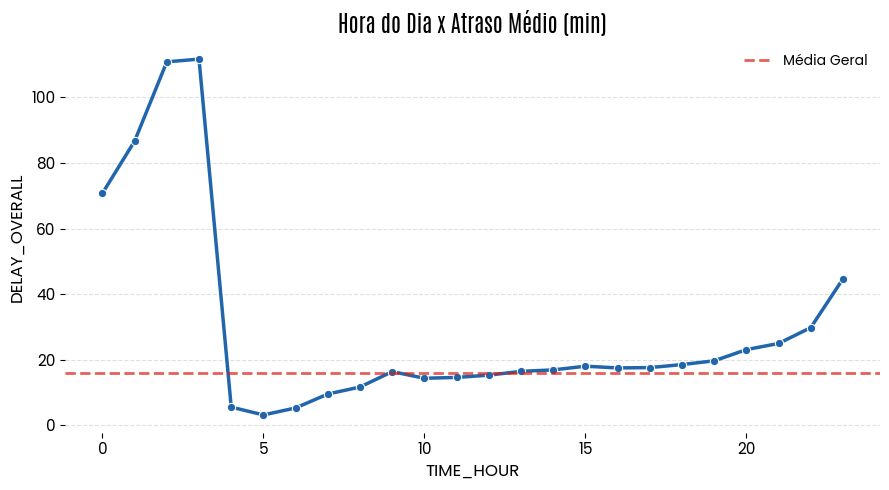

In [57]:
plot_line_chart_continuous(df, x_col="TIME_HOUR", y_col="DELAY_OVERALL", title="Hora do Dia x Atraso Médio (min)")

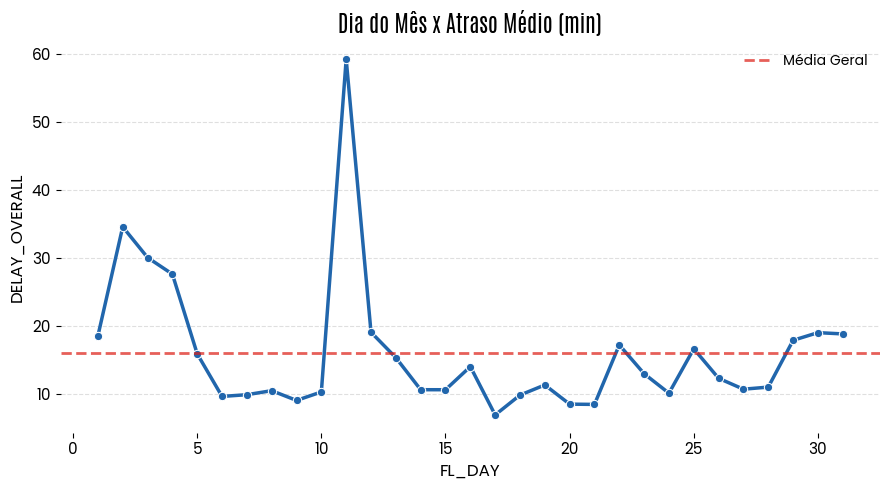

In [58]:
plot_line_chart_continuous(df, x_col="FL_DAY", y_col="DELAY_OVERALL", title="Dia do Mês x Atraso Médio (min)")

In [59]:
def plot_avg_metric_column(df, group_col, metric_col, top_n=10, title=""):
    """
    Cria gráfico de colunas minimalista para valores médios.
    """
    data = (
        df.groupby(group_col, observed=True)[metric_col]
        .mean()
        .sort_values(ascending=False)
        .head(top_n)
        .reset_index()
    )

    plt.figure(figsize=(9, 5))
    ax = sns.barplot(
        data=data,
        x=group_col,
        y=metric_col,
        color="#0077C8"
    )

    # Rótulos acima das colunas
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,  # centro da barra
            height + 0.5,                   # um pouco acima
            f'{height:.1f}',
            ha="center", va="bottom",
            fontsize=11, fontweight="medium", family="Poppins"
        )

    # Estilo minimalista
    plt.title(title, fontsize=16, fontweight="bold", family="Antonio")
    plt.xlabel("")  
    plt.ylabel("")  
    plt.xticks(rotation=45, fontsize=12, family="Poppins")  # inclina rótulos se forem longos
    plt.yticks([])  
    sns.despine(left=True, bottom=True)
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


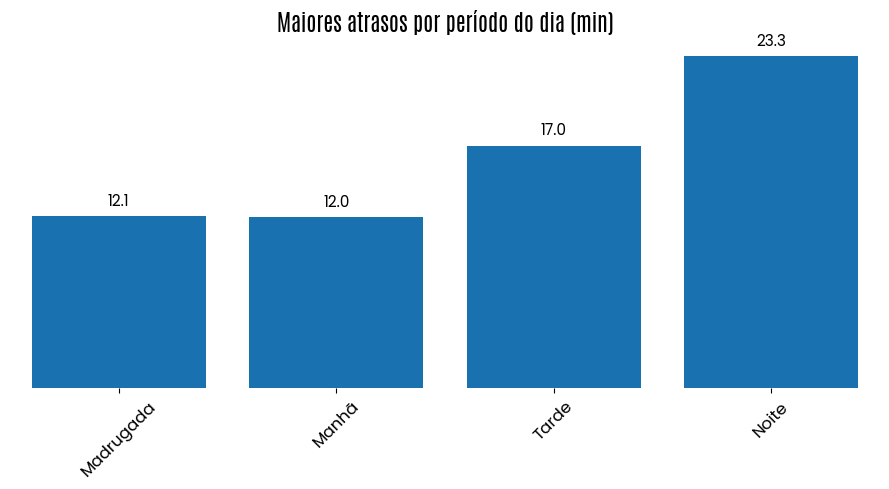

In [60]:
plot_avg_metric_column(df, "TIME_PERIOD", "DELAY_OVERALL", top_n=4,
                title="Maiores atrasos por período do dia (min)")